##### I am using the same group of data that I used on my previous assignment.

I have calculated different summary statistics, I have plotted 2 graphs, and used value counts multiple times.

In [1]:
import pandas as pd 
import numpy as np
import os 
data = pd.DataFrame()
flag = 0
for subdir, dirs, files in os.walk(r'/Users/aragaom/homework04-aragaomateus/data/raw'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".csv") and 'wastebase' in filepath and flag==0:
            print(filepath)
            data =pd.read_csv(filepath)
            flag+=1
        elif filepath.endswith(".csv") and 'wastebase' in filepath:
            data2 =pd.read_csv(filepath)
            data =data.append(data2, ignore_index=True)
            print(filepath)
            flag+=1
data

/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202112F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202104F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202201F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202108F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202109F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202105F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202103F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_20210815.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202106F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202110F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202111F.csv
/Users/aragaom/homework04-aragaomateus/data/raw/wastebase_scan_summary_202107F.csv


,product_barcode,product_label,product_size,brand_name,manufacturer_country,manufacturer_name,scan_country,data_url,bottle_weight,bottle_count
0,0,Purified drinking water,500ml,Rehaan ice,KE,Al Hatim Traders,KE,https://wastebase.org/#/o/f434a282-c578-461d-b...,NaN,11
1,415668,Extra Virgin Olive Oil,1.0 L,Sainsbury's,UK,UNKNOWN_ORG,GB,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1
2,643764,Still Mountain Water from Scotland,500 ml,M&S Food,UK,UNKNOWN_ORG,GB,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1
3,76280045314,Calcium and Magnesium,1.600ml,Solaray Dietary supplement,UK,UNKNOWN_ORG,TZ,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1
4,8080150059,Fiery Pink Pepper Body Lotion,300 ml,Molton Brown,UK,UNKNOWN_ORG,GB,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1
...,...,...,...,...,...,...,...,...,...,...
7365,4005808212521,Sun Kids 50+,200ml,NIVEA,DE,Beiersdorf AG,GB,https://wastebase.org/#/o/c03f3db6-9425-4fae-a...,NaN,2
7366,5449000118745,Drinking Water,500 ml,Kilimanjaro,US,Coca-Cola,TZ,https://wastebase.org/#/o/c3710738-2999-4396-a...,NaN,54
7367,6161101661867,The gentle detergent,500 g,Toss,KE,Kapa Oil Refineries Ltd,TZ,https://wastebase.org/#/o/e4482d9c-4392-49fe-9...,NaN,2
7368,6203009790291,Sunflower oil,1.0 L,Pera fresh produce of Tanzania,TZ,PERA Afrika Ltd,TZ,https://wastebase.org/#/o/59369b55-9a65-437f-a...,NaN,1


Because the data is divided into 12 files, I am running a for loop to parse the directory and append every data from each file into one data frame called data

In [2]:
data_to_use = data[['brand_name','manufacturer_country','bottle_count']]
grouped_data = data_to_use.groupby(['brand_name','manufacturer_country'])['bottle_count'].sum()
bottle_counts = grouped_data.to_frame().reset_index()
bottle_counts

,brand_name,manufacturer_country,bottle_count
0,7UP,US,15
1,ACACIA FOOD BEVERAGES LTD,ZM,16
2,ACTY,PT,61
3,Aber Drips,UK,68
4,Acacia Food & Beverages Ltd,ZM,24
...,...,...,...
427,yenbu,KE,48
428,Água da Bela Vista,UK,4
429,Água de Goba,MZ,109
430,Água de Namaacha,MZ,44501


Here I am isolating the data that I will use for the most in my project which it is the Brand name, manufacturing country of the bottle and the amount of bottles collected on the month that comes from that one specific brand. 
Then I created another data frame called bottle_counts in which i merge every bottle brand indiviudal counts using the groupby method.

In [3]:
#mean, deviation, outliers, median
print("The average values of bottle per manufacturer is ", bottle_counts.bottle_count.mean())
print("The standard deviation of bottle per manufacturer is ", bottle_counts.bottle_count.std())
print("The minimum value of bottle per manufacturer is ", bottle_counts.bottle_count.min())
print("The maximum value of bottle per manufacturer is ", bottle_counts.bottle_count.max())
print("The median value of bottle per manufacturer is ", bottle_counts.bottle_count.median())


The average values of bottle per manufacturer is  967.1620370370371
The standard deviation of bottle per manufacturer is  6392.1970379019795
The minimum value of bottle per manufacturer is  1
The maximum value of bottle per manufacturer is  108348
The median value of bottle per manufacturer is  46.0


In [4]:
#frequency and unique values with data
print(bottle_counts['manufacturer_country'].value_counts())
manufacturer_country_counts = pd.DataFrame(bottle_counts['manufacturer_country'].value_counts())
print(bottle_counts['manufacturer_country'].unique())
brand_bottle_counts = bottle_counts[bottle_counts.bottle_count >1000]
brand_bottle_counts = brand_bottle_counts[['brand_name','bottle_count']]
brand_bottle_counts=brand_bottle_counts.set_index('brand_name')

UK    147
US     42
KE     38
TZ     33
GB     31
ZM     30
MZ     26
ZA     24
FR      9
MW      6
PT      6
NL      6
BE      4
TR      3
SG      3
CN      2
JP      2
DE      2
CI      2
IN      2
AE      2
ES      1
TH      1
MT      1
ZW      1
DK      1
AR      1
LT      1
CA      1
GH      1
MY      1
AT      1
UA      1
Name: manufacturer_country, dtype: int64
['US' 'ZM' 'PT' 'UK' 'FR' 'KE' 'TZ' 'MZ' 'ZA' 'DE' 'LT' 'GB' 'NL' 'UA'
 'IN' 'BE' 'MW' 'CI' 'MY' 'SG' 'TR' 'GH' 'CN' 'JP' 'TH' 'ES' 'AE' 'MT'
 'DK' 'AT' 'AR' 'ZW' 'CA']


<AxesSubplot:>

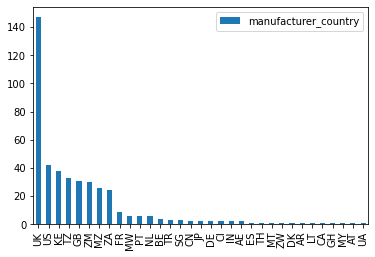

In [5]:
# visualizing countries and visualizing brands 
manufacturer_country_counts.plot.bar()

<AxesSubplot:xlabel='brand_name'>

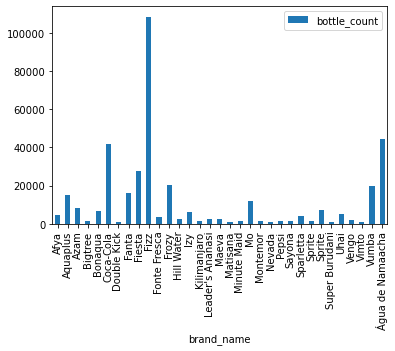

In [6]:
# just plotting using the pandas .plot function
brand_bottle_counts.plot.bar(use_index=True)